![](rplogo_small.png)

## <center>TIPP - AAI Assignement (Python for Data Science)<br>Date Due: 31st January 2020</center>
## <center>Submitted By: <u>KOAY</u> SENG TIAN<br>Email: sengtian@yahoo.com</center>


In [1]:
# TIPP - AAI Assignment (Python for Data Science)
# Date Due: 31st January 2020
# Submited By: KOAY SENG TIAN
# Email: sengtian@yahoo.com
#
# load the modules/packages.
# If there is an error, need to install the modules/packages
from bs4 import BeautifulSoup
from datetime import datetime
from PIL import Image
from PIL import ImageFilter
from platform import python_version
from tqdm.notebook import tqdm

import bs4
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas
import PIL
import random
import requests
import seaborn as sns
import skimage
import sys
import tqdm
import urllib.request

# show the versions of modules/packages imported
print('Version(s):\n')
print('python =', python_version())

print('BeautifulSoup =', bs4.__version__)
print('mathplotlib =', matplotlib.__version__)
print('numpy =', np.__version__)
print('pandas =', pandas.__version__)
print('Pillow =', PIL.__version__)
print('requests=', requests.__version__)
print('seaborn=', sns.__version__)
print('skimage =', skimage.__version__)
print('sys = ', sys.version)
print('tqdm =', tqdm.__version__)


Version(s):

python = 3.7.5
BeautifulSoup = 4.8.2
mathplotlib = 2.2.3
numpy = 1.17.4
pandas = 0.25.3
Pillow = 7.0.0
requests= 2.22.0
seaborn= 0.9.0
skimage = 0.15.0
sys =  3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]
tqdm = 4.40.2


# Question 1 (5 Marks)
A vineyard owner is planting several new rows of grapevines, and needs to know how many grapevines to plant in each row. She has determined that after measuring the length of a future row, she can use the following formula to calculate the number of vines that will fit in the row, along with the trellis end-post assemblies that will need to be constructed at each end of the row:

\begin{equation}V = \frac{R - 2E}{S} \end{equation}

The terms in the formula are:
- V is the number of grapevines that will fit in the row.
- R is the length of the row, in feet.
- E is the amount of space, in feet, used by an end-post assembly. 
- S is the space between vines, in feet.

Write a script that makes the calculation for the vineyard owner. The program should ask the user to input the following:
- The length of the row, in feet.
- The amount of space used by an end-post assembly, in feet.
- The amount of space between the vines, in feet.

Once the input data has been entered, the program should calculate and display the number of grapevines that will fit in the row.

In [2]:
# calculate the number of vinces that will fit in the row along with the trellis 
# end-post assemblies that will need to be constrcuted at each end of the row.

def calculateGrapevinesNumber(r, e, s):
    return (r - (2 * e))/(s)

def getInput(message):
    while True:
        
        # test the input is not zero
        try:
            i = float(input(message))
        except ValueError:
            print('You have entered an invalid number.  Please try again!\n')
            continue
            
        # test input is not zero in order not to cause division by zero error
        # OR input is a negative number
        if i <= 0:
            print('You have entered a zero or negative number.  Please try again!\n')
            continue
            
        # all tests passed, no lopping is needed
        break
        
    return i

print('Note: Enter the measurements in feet.\n')
rowLength = getInput('Enter the length of row\t\t\t\t\t: ')

# test numerator (R - 2E) is not less or equal zero
while True:
    endpostAssembly = getInput('Enter the amount of space used by an end-post assembly\t: ')
    if (rowLength - (2 * endpostAssembly)) < 0.:
        print('Too much space used by an end-post assembly.  Please try again!\n')
    else:
        break  
        
spaceBetweenVines = getInput('Enter the amount of space between the vines\t\t: ')

grapevinesNumber = calculateGrapevinesNumber(rowLength, endpostAssembly, spaceBetweenVines)
print('\nNumber of grapevines to fit in the row: {:.2f}.'.format(abs(grapevinesNumber)))


Note: Enter the measurements in feet.

Enter the length of row					: 20
Enter the amount of space used by an end-post assembly	: 5
Enter the amount of space between the vines		: 5

Number of grapevines to fit in the row: 2.00.


# Question 2 (5 Marks)
A class has two tests worth 25 points each along with a main exam worth 50 points.  For a student to pass the class, they must obtain an overall score of at least 50 points, and must obtain at least 25 points in the main exam. If a student’s total score is less than 50 or they obtain less than 25 points in the main exam, they receive a grade of “Fail”. Otherwise, their grade is as follows:

- If they get more than or equal to 80, they get a grade of “Distinction”.
- If they get less than 80 but more than or equal to 60, they get a “Credit” grade.
- If they get less than 60, they get a ”Pass” grade.

Write a script that prompts the user to enter their points for both tests and the exam and converts the values to integers. The script should first check if the points entered for the tests and exam are valid. If any of the test scores are not between 0 and 25, or the exam score is not between 0 and 50, the script should display an error message.

Otherwise, the script should display the total points and the grade.

In [3]:
# get the marks of test and/or exam
# also check the mark entered is in the range
def getMark(message, low=0, high=100):
    while True:
        try:
            m = int(input(message))
            
            # if the mark entered is not in the 
            if not m in range(low, high+1):
                print('The point is not in between {} and {}.  Please try again!\n'.format(low, high))
                continue
        except ValueError:
            # Re-entered the mark if the input cannot be converted to integer
            print('You have entered an invalid point.  Please try again!\n')
            continue
        break
    return m

# determine student's grade is Distinction, Pass, Credit or Fail
def determineGrade(t1, t2, exam, examPassPts=25, totalPassPts=50, distinctionL=80, creditL=60):
    
    totalPts = t1 + t2 + exam
    
    if exam < examPassPts or totalPts < totalPassPts:
        return 'Fail'
    elif totalPts >= distinctionL:
        return 'Distinction'
    elif totalPts >= creditL:
        return 'Credit'
    else:
        return 'Pass'

test1 = getMark('Enter the FIRST test point\t: ', high=25)
test2 = getMark('Enter the SECOND test point\t: ', high=25)    
exam = getMark('Enter the EXAMINATION point\t: ', high=50)

print('\nThe total points is ({}) and the grade is ({}).'. \
      format((test1+test2+exam), determineGrade(test1, test2, exam)))


Enter the FIRST test point	: 12
Enter the SECOND test point	: 13
Enter the EXAMINATION point	: 25

The total points is (50) and the grade is (Pass).


# Question 3 (5 Marks)
A “sleep debt” represents the difference between a person’s desirable and actual amount of sleep. Write a script that prompts the user to enter how many hours they slept each day over a period of seven days. Using 8 hours per day as the desirable amount of sleep, determine their sleep debt by calculating the total hours of sleep they got over the seven-day period and subtracting that from the total hours of sleep they should have got. If the user does not have a sleep debt, display a message expressing your jealousy.

In [4]:
desirableSleepHrs_perDay = 8

print('Enter the last seven days sleep hours in a single line.')
print('Example: 8 5.5 3 4 5 6 7.8\n')

while True:
    try:
        # get the 7 days of sleep hours from users and
        # convert it into a list
        sleepHrs_perWeek = list(map(float, input('Your sleep hours: ').split()))
        
        # if less than 7 days of sleep hours are entered ask user to retry again
        if len(sleepHrs_perWeek) < 7:
            print('You have entered less than 7 days of sleep hours. Please try again!\n')
            continue
            
        # re-try if have more than 24 hours of sleep per day
        if len([sleepHour for sleepHour in sleepHrs_perWeek if sleepHour > 24]) > 0:
            print('One or more days have more than 24 hours of sleep.  Please try again!\n')
            continue
            
        # re-try if have more than 24 hours of sleep per day
        if len([sleepHour for sleepHour in sleepHrs_perWeek if sleepHour < 0]) > 0:
            print('One or more days have less than zero hour of sleep.  Please try again!\n')
            continue
            
    except ValueError:
        print('One or more of the sleep hours entered is/are invalid. Please try again!\n')
        continue
    break
    
# if more than 7 days of sleep hours are entered only the
# first 7 days of sleep hours are used for the calculation
yourTotalSleepHrs_perWeek = sum(sleepHrs_perWeek[:7])
desirableSleepHrs_perWeek = desirableSleepHrs_perDay * 7

print('\nDesirable sleep hours per week\t: {:.2f}'.format(desirableSleepHrs_perWeek))
print('Your sleep hours per week\t: {:.2f}'.format(yourTotalSleepHrs_perWeek))

sleepDebt = desirableSleepHrs_perWeek - yourTotalSleepHrs_perWeek
if sleepDebt > 0:
    print('You needs to catch up with your sleep by another {:.2f} hour(s)'.format(sleepDebt))
elif sleepDebt == 0:
    print('You have enough sleep.  Keep it up!')
else:
    print('I am jealous! You have more than enough sleep, exceeding by {:.2f} hour(s)'.format(sleepDebt * -1))
    

Enter the last seven days sleep hours in a single line.
Example: 8 5.5 3 4 5 6 7.8

Your sleep hours: 8 5.5 3 4 5 6 7.8

Desirable sleep hours per week	: 56.00
Your sleep hours per week	: 39.30
You needs to catch up with your sleep by another 16.70 hour(s)


# Question 4 (5 Marks)
a. Given 2 arrays, write the code to stack them horizontally and vertically. (2 marks)

Given arrays:
```python
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

Desired output for stacking vertically:
#> array([[0, 1, 2, 3, 4],
#> [5, 6, 7, 8, 9],
#> [1, 1, 1, 1, 1],
#> [1, 1, 1, 1, 1]])

Desired output for stacking horizontally:
#> array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
#> [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])
```

b. Import the image from the following URL and convert it to a numpy array and use PIL’s fromarray() to display the image. (3 marks)

```python
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
```

### 4(a)

In [5]:
# Part (a) of Question 4
import numpy as np

a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# stack the arrays vertically
c = np.vstack((a, b))

# stack the arrays horizontally
d = np.hstack((a,b))


print(c)
print()

print(d)
print()


[[0 1 2 3 4]
 [5 6 7 8 9]
 [1 1 1 1 1]
 [1 1 1 1 1]]

[[0 1 2 3 4 1 1 1 1 1]
 [5 6 7 8 9 1 1 1 1 1]]



### 4(b)

(-0.5, 451.5, 302.5, -0.5)

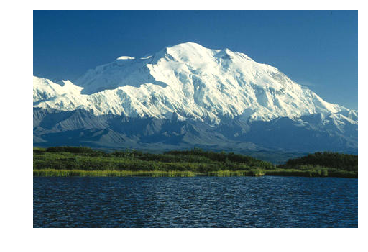

In [6]:
# Part (b) of Question 4
%matplotlib inline

# use scikit-image image processing, the io.imread returns a numpy array
import skimage.io

# Python Imaging Library is a free library for the Python programming language that 
# adds support for opening, manipulating, and saving many different image file formats.
from PIL import Image

# use matplotlib.pyplot to display the image 'inline'
import matplotlib.pyplot as plt
import urllib.error

# the follow class is to surpress the stack trace
# when the URL passed in to imread is incorrect
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

# load the JPEG from URL and stored into an array
url = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
try:
    img_array = skimage.io.imread(url)
except urllib.error.HTTPError as err:
    print("HTTP error {0}: {1}".format(err.code, err.reason))
    raise StopExecution

# print type and size of array
# type(img_array)
# img_array.shape
img = Image.fromarray(img_array)
img.show()

# alternative way to display the image as mentioned in python class
# the image is displayed "inline" in jupyter notebook
plt.imshow(img_array)
plt.axis('off')


# Question 5 (5 Marks)
a. Write a Python program to draw line charts of the financial data of Alphabet Inc. between October 3, 2019 to October 7, 2019. Data source: https://finance.yahoo.com/quote/GOOG/history/.  (3 marks)

b. Read face cream and facewash product sales data (http://bit.ly/35rh8VW) and show it using the bar chart. (2 marks)

### 5(a)

In [7]:
#Part(a) of Question 5

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

# the file was downloaded from 
# https://finance.yahoo.com/quote/GOOG/history/
# and stored in local drive
# datasets: Google = 30 Sept 2019 to 01 Nov 2019
Downloaded_Google_CSV = 'GOOG_30092019_01112019.csv'

try:
    df = pd.read_csv(Downloaded_Google_CSV)
except FileNotFoundError as err:
    print('File not found!')
else:
    df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
1,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
2,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
4,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


In [8]:
# format the date to 'dd-mm-YYY'
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d-%m-%Y')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,30-09-2019,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
1,01-10-2019,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
2,02-10-2019,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3,03-10-2019,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
4,04-10-2019,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


<Figure size 720x504 with 0 Axes>

<BarContainer object of 25 artists>

Text(0.5,1,'Google (Daily Chart)')

Text(0,0.5,'Adjusted Closing Price')

Text(0,0.5,'Volume')

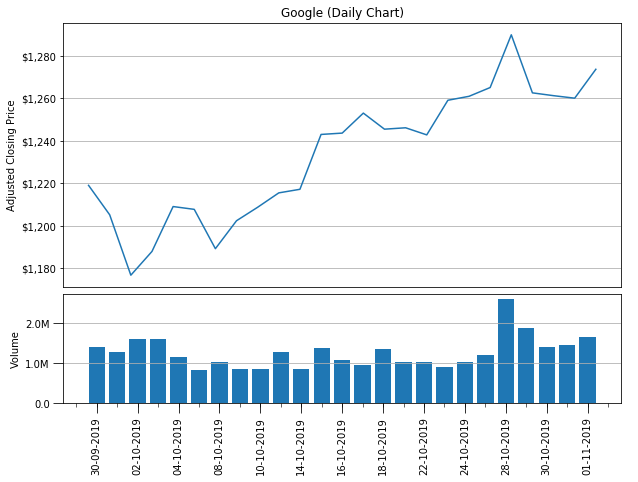

In [9]:
# plot the daily (after adjusted) close price of Google stock
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.ticker as mplTicker

# volume of Google stock is in millions
# reformat the scale to smaller number
def reformatLargeVolumeValue(tick_val, pos):

    #show 'M' for million volume
    if tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    #show 'K' for thousand volume
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    return new_tick_format

plt.figure(figsize=(10,7))

# plot 2 grids in 2 rows
top = plt.subplot2grid((10, 5), (0, 0), rowspan=7, colspan=5)
bottom = plt.subplot2grid((10, 5), (7,0), rowspan=3, colspan=5)

# plot the 'top' chart, 'Adjusted Close' x 'Date'
top.plot(df['Date'], df['Adj Close'])

# plot the 'bottom' chart, 'Volume' x 'Date'
bottom.bar(df['Date'], df['Volume']) 
 
#show the price with a '$' sign in front of the value for top chart
top_dollarFormatter = '${x:,.0f}'
tick = mplTicker.StrMethodFormatter(top_dollarFormatter)
top.grid(True)
top.set_title('Google (Daily Chart)')
top.set_ylabel('Adjusted Closing Price')
top.xaxis.set_visible(False)
top.yaxis.set_major_formatter(tick) 

#bottom chart, the dates are rotated 90 degree
#as the date string length is quite long
bottom.grid(True, axis='y')
bottom.set_ylabel('Volume')
bottom.tick_params(axis='x', labelrotation=90.0)
bottom.tick_params(which='major', length=10)
bottom.tick_params(which='minor', length=4)

#reformat large volume value to 'M' for million
tick = mplTicker.FuncFormatter(reformatLargeVolumeValue)
bottom.yaxis.set_major_formatter(tick);

bottom.xaxis.set_major_locator(MultipleLocator(2))
bottom.xaxis.set_minor_locator(MultipleLocator(1))


### 5(b)

In [10]:
#Part(b) of Quetion 5
import pandas as pd
import matplotlib.pyplot as plt

Downloaded_Facecream_Product_Sales_Data_CSV = 'facecream_product_sales_data.csv'

try:
    df = pd.read_csv(Downloaded_Facecream_Product_Sales_Data_CSV)
except FileNotFoundError as err:
    print('File not found!')
else:
    df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


Text(0.5,0,'Month')

Text(0,0.5,'Units')

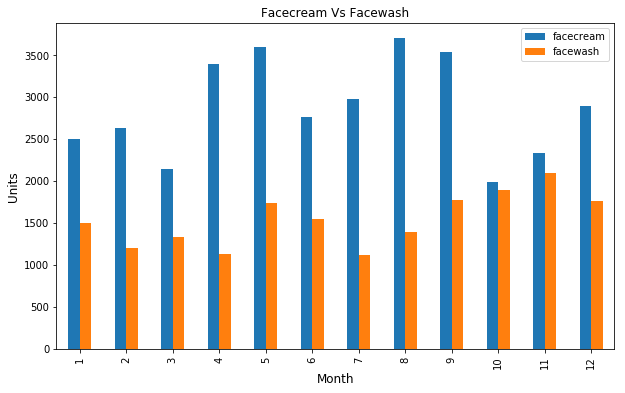

In [11]:
ax = df.plot.bar(x='month_number', y=['facecream', 'facewash'], figsize=(10, 6), title='Facecream Vs Facewash')
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Units", fontsize=12)

# Question 6 (5 Marks)
Use this automotive dataset (http://bit.ly/35lErAo) to answer the following questions using the pandas module.

a. From given data set print first and last five rows. (1 mark)

b. Clean data and update the CSV file. (1 mark)

c. Count total cars per company. (1 mark)

d. Find each company’s Highest price car. (1 mark)

e. Sort all cars by Price column. (1 mark)

### 6(a) - From given data set print first and last five rows. (1 mark)

In [12]:
import numpy as np
import pandas as pd

# take the raw data from github, given original URL is http://bit.ly/35lErAo
urlDataset = 'https://raw.githubusercontent.com/kwseow/kwseow.github.io/master/datasets/Automobile_data.csv'

df = pd.read_csv(urlDataset)

df.info()
# based on the info below there are 3 'blanks' in price column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
index               61 non-null int64
company             61 non-null object
body-style          61 non-null object
wheel-base          61 non-null float64
length              61 non-null float64
engine-type         61 non-null object
num-of-cylinders    61 non-null object
horsepower          61 non-null int64
average-mileage     61 non-null int64
price               58 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB


In [13]:
df.describe()

# Based on below the index has min value (zero) which is alright
# Conclusion: 
#    - there is no zero value in the dataset that does not make sense

,index,wheel-base,length,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,58.000000
mean,40.885246,98.481967,173.098361,107.852459,25.803279,15387.000000
std,25.429706,6.679234,14.021846,53.524398,8.129821,11320.259841
min,0.000000,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,18.000000,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,39.000000,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,61.000000,101.200000,177.300000,123.000000,31.000000,18120.500000
max,88.000000,120.900000,208.100000,288.000000,47.000000,45400.000000


In [14]:
# print first 5 rows of the dataset
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [15]:
# print last 5 rows of the dataset
df.tail()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0
60,88,volvo,wagon,104.3,188.8,ohc,four,114,23,13415.0


### 6(b) - Clean data and update the CSV file. (1 mark)

In [16]:
df['company'].unique()

# below shows the company names found in the dataset and they are legit car manufacturer names

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
df['body-style'].unique()

# below shows that the body-styles in the dataset and they are alright

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [18]:
# skip the below since the information is already in the description (df.describe())
#df['wheel-base'].dtype
#df['length'].dtype

In [19]:
df['engine-type'].unique()

# dohc  (Dual OverHead Cam), 
# dohcv (Dual OverHead Cam and Valve), 
# l     (L engine), 
# ohc   (OverHead Cam), 
# ohcf  (OverHead Cam and Valve F engine), 
# ohcv  (OverHead Cam and Valve) and 
# rotor (Rotary engine)

#engine types in the dataset are alright

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [20]:
df['num-of-cylinders'].unique()

# number of cylinders are in words i.e. 1->'one', 2->'two'
# action: to convert to integer so that the model can process it

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
# skip the below since the information is already in the description (df.describe())
#df['horsepower'].dtype
#df['average-mileage'].dtype
#df['price'].dtype

In [22]:
# show the rows that have NaN
x = df.isnull().values.any(axis=1)
indexes = np.where(x == True)
df.loc[indexes]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


[Text(0.5,0,'wheel-base')]

[Text(0.5,0,'length')]

[Text(0.5,0,'horsepower')]

[Text(0.5,0,'average-mileage')]

[Text(0.5,0,'price')]

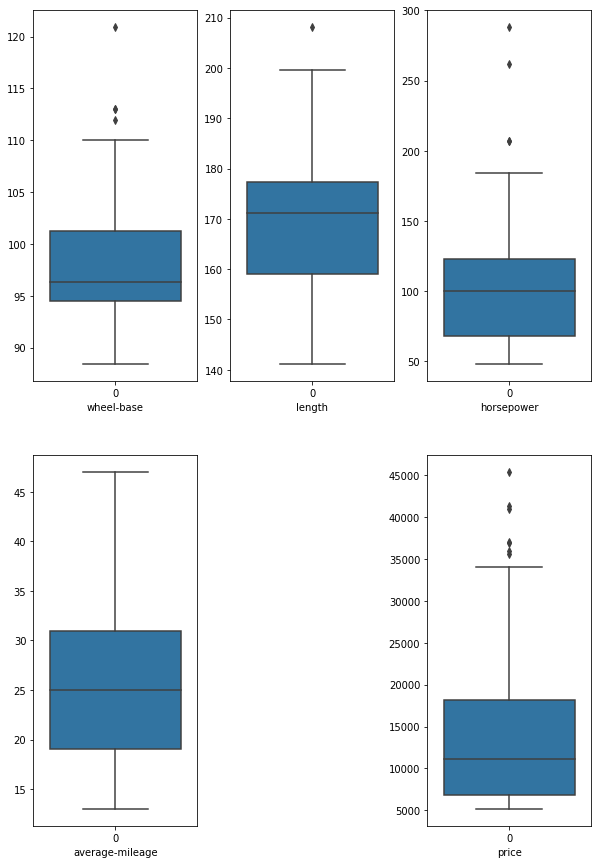

In [23]:
# plot box plots to observe the outliers (if any)
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(10,15))

sns.boxplot(data=df['wheel-base'], orient='v', ax=axes[0, 0]).set(xlabel='wheel-base')
sns.boxplot(data=df['length'], orient='v', ax=axes[0, 1]).set(xlabel='length')
sns.boxplot(data=df['horsepower'], orient='v', ax=axes[0, 2]).set(xlabel='horsepower')
sns.boxplot(data=df['average-mileage'], orient='v', ax=axes[1, 0]).set(xlabel='average-mileage')
sns.boxplot(data=df['price'], orient='v', ax=axes[1,2]).set(xlabel='price')
axes[1, 1].set_visible(False)

In [24]:
# clean the data

# convert cylinders (in word) to integer
cyl_conversion_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(cyl_conversion_dict)

# fill the NaN
# before
print(df.isnull().sum())

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64


In [25]:
#after
#option 1 - easiest
#drop the rows that have NaN
df.dropna(inplace=True)

# 61 rows - 3 rows = 58 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 60
Data columns (total 10 columns):
index               58 non-null int64
company             58 non-null object
body-style          58 non-null object
wheel-base          58 non-null float64
length              58 non-null float64
engine-type         58 non-null object
num-of-cylinders    58 non-null int64
horsepower          58 non-null int64
average-mileage     58 non-null int64
price               58 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 5.0+ KB


In [26]:
# option 2 - impute missing values
# fill missing values with mean column values

# uncomment the below code to see it working !
#df['price'].fillna(df['price'].mean(), inplace=True)

In [27]:
# save the CSV locally
import os

saved_filename = "cleaned_Automobile_data.csv"

df.to_csv(os.path.join(os.getcwd(), saved_filename))
print('File saved:\n{}'.format(os.path.join(os.getcwd(), saved_filename)))

File saved:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\cleaned_Automobile_data.csv


### 6(c) - Count total cars per company. (1 mark)

In [28]:
df['company'].value_counts(ascending=True)

isuzu            1
volvo            2
dodge            2
porsche          2
chevrolet        3
jaguar           3
honda            3
alfa-romero      3
volkswagen       4
audi             4
mitsubishi       4
mercedes-benz    4
mazda            5
nissan           5
bmw              6
toyota           7
Name: company, dtype: int64

### 6(d) - Find each company’s Highest price car. (1 mark)

In [29]:
df.groupby('company')['company', 'price'].max()

,company,price
company,,
alfa-romero,alfa-romero,16500.0
audi,audi,18920.0
bmw,bmw,41315.0
chevrolet,chevrolet,6575.0
dodge,dodge,6377.0
honda,honda,12945.0
isuzu,isuzu,6785.0
jaguar,jaguar,36000.0
mazda,mazda,18344.0


### 6(e) - Sort all cars by Price column. (1 mark)

In [30]:
df.sort_values(['price'], ascending=False)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,8,184,14,45400.0
11,14,bmw,sedan,103.5,193.8,ohc,6,182,16,41315.0
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,8,184,14,40960.0
46,62,porsche,convertible,89.5,168.9,ohcf,6,207,17,37028.0
12,15,bmw,sedan,110.0,197.0,ohc,6,182,15,36880.0
26,35,jaguar,sedan,102.0,191.7,ohcv,12,262,13,36000.0
25,34,jaguar,sedan,113.0,199.6,dohc,6,176,15,35550.0
45,61,porsche,hardtop,89.5,168.9,ohcf,6,207,17,34028.0
24,33,jaguar,sedan,113.0,199.6,dohc,6,176,15,32250.0
10,13,bmw,sedan,103.5,189.0,ohc,6,182,16,30760.0


# Question 7 (10 Marks)
Write a script that goes to a photo-sharing site like Flickr or Imgur, searches for a category of photos, and then downloads all the resulting images. You could write a script that works with any photo site that has a search feature.
After all images were downloaded, perform the following:

1. Convert the images to greyscale and save them into a separate directory
2. Resize the images to 28px by 28px and save them into a separate directory
3. With the 28px by 28px, create images of 5x5 photo grids
4. Randomly, apply filters (e.g. blur, rotation) on the original images and save them into a separate directory. Rename the new images with the applied filter’s name. E.g. if the original filename is img_1234.jpg, a blur filter is applied, the new filename could be img_1234_blur.jpg.

In [31]:
# abstracted the functions as below
# the code tested for flickr and imgur

from bs4 import BeautifulSoup
from datetime import datetime
from PIL import Image
from PIL import ImageFilter
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import os
import random
import requests
import sys
import numpy as np
import urllib.request

imgProvider = ''
imgDir = ''
gsImgDir = ''
rsImgDir = ''
fiImgDir = ''

# photo-sharing URLs
# support imgur and flickr
provider_imgur = 'imgur'
provider_flickr = 'flickr'

In [32]:
#Contains 2 specific functions that extract the image URls from IMGUR and FLICKR (for example)
#assumption is that the 2 web sites requires different methods to extract the URLs.
from urllib.error import HTTPError, URLError
import socket

# scrap the image URLs from the web site IMGUR
def imgur_getImgURLs():
    imgurUrl = 'https://imgur.com/search/score?q='

    #replace space(s) in input with '+'
    criteria = input("Enter search criteria: ")
    url = imgurUrl + criteria.replace(' ', '+')

    try:
        #set timeout to 10 seconds (arbitary)
        soup = BeautifulSoup(urllib.request.urlopen(url, timeout=10).read(), 'html.parser')
    except HTTPError as error:
        print ('\nData not retrieved because (%s)\nURL: %s' % (error, url))
        return []
    except URLError as error:
        if isinstance(error.reason, socket.timeout):
            print ('\nSocket timed out for URL %s' % url)
        else:
            print ('\nSome other error happened!')
        return []
    
    imgTags = soup.findAll('img')    
    
    # 1) skip the last image tag since the image is not what we want to extract
    # 2) the first 2 chars in the 'src=' are skipped too
    #
    # Sample:
    # [<img alt="" src="//i.imgur.com/OM1jAhsb.jpg"/>, <img alt="" src="//i.imgur.com/4AiXzf8b.jpg"/>, ...]
    return [tag.get('src')[2:] for tag in imgTags[:-1]]


# scrap the image URLs from the web site FLICKR
# decided to do dedicated function since no two image providers will work the same way
def flickr_getImgURLs():
    flickrUrl = 'https://flickr.com/search/?text='

    # replace space(s) in input with '+'
    criteria = input("Enter search criteria: ")
    url = flickrUrl + criteria.replace(' ', '+')

    try:
        #set timeout to 10 seconds (arbitary)
        soup = BeautifulSoup(urllib.request.urlopen(url, timeout=10).read(), 'html.parser')
    except HTTPError as error:
        print ('\nData not retrieved because (%s)\nURL: %s' % (error, url))
        return []
    except URLError as error:
        if isinstance(error.reason, socket.timeout):
            print ('\nSocket timed out for URL %s' % url)
        else:
            print ('\nSome other error happened!')
        return []
    
    # class = photo-list-photo-view
    plpv = soup.find_all(class_='photo-list-photo-view')
    
    imgUrlList = []

    # the image is found under style attributes
    # Sample:
    # <div class="view photo-list-photo-view requiredToShowOnServer awake" ....
    # ... style="transform: translate(0px, 0px); .... 
    # background-image: url(//live.staticflickr.com/3215/2889462692_d34b7463cc_m.jpg)">
    # ...
    for i in range(len(plpv)):
        index = plpv[i].attrs['style'].find('url')
        imgUrlList.append(plpv[i].attrs['style'][index + len('url(//') : -1])
    
    return imgUrlList

In [33]:
# provide a list of URls for the function to extract
# the images
def downloadnSaveImages(urls):
    
    if len(urls) == 0:
        print('\nNo image file to download.\n')
        return
        
    # the image(s) is/are stored in their respective "provider/date" directory
    if not os.path.exists(imgDir):
        os.makedirs(imgDir)
        
    print('\nSaving file(s) to directory:\n{}\n'.format(imgDir))
       
    fileCount = 0  
    pbar = tqdm(urls)
    for url in pbar:     

        # check the url has a 'i' in front and file is JPEG
        if url[-3:] == 'jpg':

            picture_url = 'http://' + url
            filename = os.path.join(imgDir, url[url.rfind('/') + 1 :])

            f = open(filename, 'wb')
            f.write(requests.get(picture_url).content)
            f.close()

            fileCount += 1

    print('{} files saved'.format(fileCount))

In [34]:
# convert the images stored in local drive
# the images are converted to grey scale
def convertToGreyScale():
    
    # create the path to image directory
    if not os.path.exists(imgDir):
        print('Images directory does not exist!\n')
        return

    # create the directory to store grey scaled images
    if not os.path.exists(gsImgDir):
        os.makedirs(gsImgDir)
        
    print('\nSaving file(s) to directory:\n{}\n'.format(gsImgDir))
    
    # create a list of file to be converted to greyscales
    fileList = os.listdir(imgDir)
    
    # start the conversion
    fileCount = 0
    pbar = tqdm(fileList)
    for file in pbar:
        image = Image.open(os.path.join(imgDir, file))
        gsImage = image.convert(mode='L')
        gsImage.save(os.path.join(gsImgDir, 'gs_'+ file))
        gsImage.close()
        fileCount += 1     
    
    print('{} files saved.\n'.format(fileCount))

In [35]:
# resize the image
# the default size is 28 x 28 pixels
def resizeImage (pxX=28, pxY=28):
    
    global rsImgDir
    rsImgDir = os.path.join(baseDir, timeRequested + "_" + str(pxX) + 'x' + str(pxY) + 'px')
    
    # create the path to image directory
    if not os.path.exists(imgDir):
        print('Images directory does not exist!\n')
        return
    
    if not os.path.exists(rsImgDir):
        os.makedirs(rsImgDir)
        
    print('\nSaving file(s) to directory:\n{}\n'.format(rsImgDir))
    
    # create a list of file to be resized
    fileList = os.listdir(imgDir)
    
    # start the conversion
    fileCount = 0
    pbar = tqdm(fileList)
    for file in pbar:
        image = Image.open(os.path.join(imgDir, file))
        rsImage = image.resize((pxX, pxY))
        rsImage.save(os.path.join(rsImgDir, 'rs_'+ file))
        rsImage.close()
        fileCount += 1     
    
    print('{} files saved.\n'.format(fileCount))

In [36]:
# display the images in grid
# default grid size is 5x5
def displayImageGrid(gridSize=(5,5)):      

    # shows the first gridSize[0] * gridSize[1] images when
    # number of images is greater than gridSize
    fileList = os.listdir(rsImgDir)[: gridSize[0] * gridSize[1]]
    if len(fileList) < (gridSize[0] * gridSize[1]):
        for i in range(len(fileList), (gridSize[0] * gridSize[1])):
            fileList.append('')
    
    imgArray = np.array(fileList).reshape(gridSize[0], gridSize[1])
    
    fig, ax = plt.subplots(gridSize[0], gridSize[1], figsize=(6, 6))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    for x in range(gridSize[0]):
        for y in range(gridSize[1]):
            if not imgArray[x, y] == '':
                image = Image.open(os.path.join(rsImgDir, imgArray[x, y]))
                ax[x, y].xaxis.set_major_locator(plt.NullLocator())
                ax[x, y].yaxis.set_major_locator(plt.NullLocator())
                ax[x, y].imshow(image)
            else:
                # do not show the grid lines if the grid size is 
                # larger than number of images to show
                ax[x, y].set_visible(False)                

In [37]:
# apply filter to the images
# current choice is as shown in the code
def applyFilter():
    
    filterChoices = ['blur', 'rotate', 'flipLR', 'flipTB']
    
    # the image(s) is/are stored in their respective "provider/date" directory
    if not os.path.exists(fiImgDir):
        os.makedirs(fiImgDir)
    
    print('\nSaving file(s) to directory:\n{}\n'.format(fiImgDir))
        
    # get file list of the original image directory
    fileList = os.listdir(imgDir)
    
    fileCount = 0
    pbar = tqdm(fileList)
    for file in pbar:
        choice = random.choice(filterChoices)
        image = Image.open(os.path.join(imgDir, file))
        
        if choice == 'blur':
            pImage = image.filter(ImageFilter.GaussianBlur(radius=5))
        elif choice == 'rotate':
            pImage = image.rotate(45)
        elif choice == 'flipLR':
            pImage = image.transpose(Image.FLIP_LEFT_RIGHT)
        elif choice == 'flipTB':
            pImage = image.transpose(Image.FLIP_TOP_BOTTOM)
        else:
            # just in case no choice was generated
            pImage = image.rotate(45)
            choice = 'rotate'
        
        pImage.save(os.path.join(fiImgDir, file[:-4] + '_' + choice + '.' + file[-3:]))
        pImage.close()
        fileCount += 1

    print('{} files saved\n'.format(fileCount))

### Extract Images from IMGUR

In [38]:
# Extract images from IMGUR
# let's start extract images from imgur web site first
imageURLs = imgur_getImgURLs()

print('\n{} image links collected.\n'.format(len(imageURLs)))

# set up the paths for the following functions to use
imgProvider = provider_imgur 
timeRequested = datetime.today().strftime('%Y-%m-%d_%H-%M')
baseDir = os.path.join(os.getcwd(), imgProvider) 

# original images directory
imgDir = os.path.join(baseDir, timeRequested)

# greyscale images directory
gsImgDir = os.path.join(baseDir, timeRequested + "_greys")

# filtered image directory
fiImgDir = os.path.join(baseDir, timeRequested + '_filter') 

Enter search criteria: ultraman

58 image links collected.



In [39]:
# download the images for image links from imgur's site
downloadnSaveImages(imageURLs)


Saving file(s) to directory:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\imgur\2020-01-30_11-14




58 files saved


### Part 1 of Question 7
Convert the images to greyscale and save them into a separate directory

In [40]:
# convert to grey scales for images from imgur's sites  
convertToGreyScale()


Saving file(s) to directory:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\imgur\2020-01-30_11-14_greys




58 files saved.



### Part 2 of Question 7
Resize the images to 28px by 28px and save them into a separate directory

In [41]:
# resize the images for image links from imgur's web site    
resizeImage()


Saving file(s) to directory:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\imgur\2020-01-30_11-14_28x28px




58 files saved.



### Part 3 of Question 7
With the 28px by 28px, create images of 5x5 photo grids

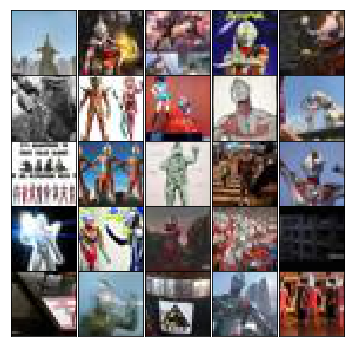

In [42]:
# display the images in grid for image links from imgur's web site
                    
# display 28px x 28px images in 5x5 grid, the 
# images are taken from the greyscale directory
displayImageGrid()

### Part 4 of Question 7
Randomly, apply filters (e.g. blur, rotation) on the original images and save them into a separate directory. Rename the new images with the applied filter’s name. E.g. if the original filename is img_1234.jpg, a blur filter is applied, the new filename could be img_1234_blur.jpg.

In [43]:
# apply filters (i.e. blur, rotation etc.) for image links from imgur's web site
applyFilter()


Saving file(s) to directory:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\imgur\2020-01-30_11-14_filter




58 files saved



## Note:

After the above operations, files are stored in the directories as shown in the captured screen shot.

Directory naming convention: Year-Month-Date_Hours-Min...

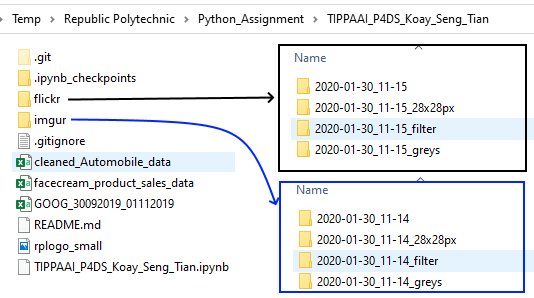

The same file directory structure also applied for operations done on FLICKR.

### Now let's extract images from FLICKR

In [44]:
# Extract images from FLICKR

# setup
# Extract images from IMGUR
# let's start extract images from imgur web site first
imageURLs = flickr_getImgURLs()

print('\n{} image links collected.\n'.format(len(imageURLs)))

# set up the paths for the following functions to use
imgProvider = provider_flickr 
timeRequested = datetime.today().strftime('%Y-%m-%d_%H-%M')
baseDir = os.path.join(os.getcwd(), imgProvider) 

# original images directory
imgDir = os.path.join(baseDir, timeRequested)

# greyscale images directory
gsImgDir = os.path.join(baseDir, timeRequested + "_greys")

# filtered image directory
fiImgDir = os.path.join(baseDir, timeRequested + '_filter') 

Enter search criteria: lion

24 image links collected.



In [45]:
# download the image from links from FLICKR
downloadnSaveImages(imageURLs)


Saving file(s) to directory:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\flickr\2020-01-30_11-15




24 files saved


In [46]:
# convert the images to grey scales from FLICKER
convertToGreyScale()


Saving file(s) to directory:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\flickr\2020-01-30_11-15_greys




24 files saved.



In [47]:
# resize the images from FLICKR
resizeImage()


Saving file(s) to directory:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\flickr\2020-01-30_11-15_28x28px




24 files saved.



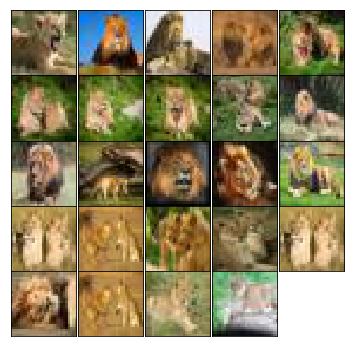

In [48]:
# display the downloaded images from FLICKR as a grid 
displayImageGrid()

In [49]:
# apply filter i.e. blur, rotate etc. for images from FLICKR
applyFilter()


Saving file(s) to directory:
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\flickr\2020-01-30_11-15_filter




24 files saved

